# Debugging Exercise: Population Growth
We want to plot the population growth of a few selected countries.

The CSV file contains the population in millions.

**Fix five bugs in the analysis.**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('population.csv', sep=';')
df.head()

,country,1900,1910,1920,1930,1940,1949,1950,1951,1952,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,5.021,5.351,5.814,NaN,7.034,NaN,7.752,7.839,7.935,...,25.184,25.878,26.529,27.207,27.962,28.809,29.727,30.682,31.628,32.527
1,Algeria,4.946,5.404,6.064,6.876,7.797,NaN,8.872,9.040,9.216,...,33.749,34.262,34.811,35.402,36.036,36.717,37.439,38.186,38.934,39.667
2,Angola,2.898,3.137,3.388,3.642,3.920,NaN,4.355,4.440,4.529,...,18.541,19.184,19.842,20.520,21.220,21.942,22.686,23.448,24.228,25.022
3,Argentina,4.757,6.853,8.885,11.898,14.201,NaN,17.150,17.507,17.866,...,39.559,39.970,40.382,40.799,41.223,41.656,42.095,42.538,42.980,43.417
4,Australia,3.744,4.408,5.345,6.474,7.052,NaN,8.177,8.418,8.627,...,20.606,20.976,21.370,21.771,22.163,22.542,22.911,23.270,23.622,23.969


In [4]:
# drop empty column
del df['1949']

In [5]:
# drop rows with missing data
df.dropna(inplace=True) # could also do interpolation (imputation)

In [6]:
df.head(3)

,country,1900,1910,1920,1930,1940,1950,1951,1952,1953,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,Algeria,4.946,5.404,6.064,6.876,7.797,8.872,9.040,9.216,9.405,...,33.749,34.262,34.811,35.402,36.036,36.717,37.439,38.186,38.934,39.667
2,Angola,2.898,3.137,3.388,3.642,3.920,4.355,4.440,4.529,4.622,...,18.541,19.184,19.842,20.520,21.220,21.942,22.686,23.448,24.228,25.022
3,Argentina,4.757,6.853,8.885,11.898,14.201,17.150,17.507,17.866,18.224,...,39.559,39.970,40.382,40.799,41.223,41.656,42.095,42.538,42.980,43.417


In [26]:
# select Argentina
df.loc[df['country'].eq('Argentina')]

,country,1900,1910,1920,1930,1940,1950,1951,1952,1953,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3,Argentina,4.757,6.853,8.885,11.898,14.201,17.15,17.507,17.866,18.224,...,39.559,39.97,40.382,40.799,41.223,41.656,42.095,42.538,42.98,43.417


In [27]:
df2 = df.set_index('country') # does not mutate the df, returns a copy

In [29]:
# df2.loc['Argentina']

In [1]:
df.set_index('country', inplace=True) # changes the df, returns None
df.head(3)

NameError: name 'df' is not defined

In [33]:
df.head(3)

,1900,1910,1920,1930,1940,1950,1951,1952,1953,1954,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Algeria,4.946,5.404,6.064,6.876,7.797,8.872,9.040,9.216,9.405,9.610,...,33.749,34.262,34.811,35.402,36.036,36.717,37.439,38.186,38.934,39.667
Angola,2.898,3.137,3.388,3.642,3.920,4.355,4.440,4.529,4.622,4.715,...,18.541,19.184,19.842,20.520,21.220,21.942,22.686,23.448,24.228,25.022
Argentina,4.757,6.853,8.885,11.898,14.201,17.150,17.507,17.866,18.224,18.579,...,39.559,39.970,40.382,40.799,41.223,41.656,42.095,42.538,42.980,43.417


In [36]:
countries_i_am_interested_in = ['Argentina', 'Ukraine', 'Vietnam', 'Zimbabwe']
countries = df.loc[countries_i_am_interested_in]
countries

,1900,1910,1920,1930,1940,1950,1951,1952,1953,1954,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Argentina,4.757,6.853,8.885,11.898,14.201,17.150,17.507,17.866,18.224,18.579,...,39.559,39.970,40.382,40.799,41.223,41.656,42.095,42.538,42.980,43.417
Ukraine,23.472,25.729,28.214,30.946,33.943,37.298,37.816,38.361,38.916,39.472,...,46.503,46.249,46.028,45.831,45.647,45.478,45.320,45.165,45.002,44.824
Vietnam,14.598,16.454,18.182,20.146,22.322,24.810,25.364,25.977,26.646,27.371,...,84.980,85.771,86.589,87.449,88.358,89.322,90.336,91.379,92.423,93.448
Zimbabwe,1.912,2.050,2.200,2.363,2.538,2.747,2.830,2.918,3.010,3.105,...,13.128,13.298,13.495,13.721,13.974,14.256,14.565,14.898,15.246,15.603


In [37]:
# tilt the table by 90°
timeline = countries.transpose()
timeline.head()

country,Argentina,Ukraine,Vietnam,Zimbabwe
1900,4.757,23.472,14.598,1.912
1910,6.853,25.729,16.454,2.050
1920,8.885,28.214,18.182,2.200
1930,11.898,30.946,20.146,2.363
1940,14.201,33.943,22.322,2.538


In [40]:
import pandas as pd

# pandas is very strong with dates
timeline.index = pd.to_datetime(timeline.index)

<AxesSubplot:>

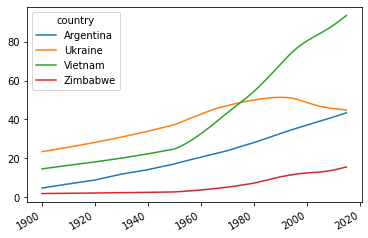

In [41]:
# why is this a terrible plot?
timeline.plot()